Exploring the Titanic Dataset
=============================
Background
-----------
The RMS Titanic was a brittish passenger ship which sank in the North Atlantic Ocean after colliding with an iceberg in 1912, it was making its maiden voyage from Southampton to New York City. Although there were over 2,000 crew and passengers on the ship, which included some of the wealthiest people in the world at the time, the Titanic only carried enough life boats to save about 1,178 people, so sadly, many passengers did not survive.

*More Information:* https://en.wikipedia.org/wiki/RMS_Titanic

In this project I am going to be investigating a dataset with information about the passengers of the Titanic. I will be asking questions about who the passengers were, like how old they were, who were they travelling with and what factors contributed to whether or not a passenger survived.

The first step in my analysis is to load in the data set, check how many entries it has, and see if there are any missing values.

In [176]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

data = pd.read_csv('titanic_data.csv') #Load in the dataset

print "The number of passengers in the data set is {}.".format(len(data))
print "The number of features for each passenger is {}.".format(len(data.columns))

data.head() #Visualize the first 5 rows to see the features

The number of passengers in the data set is 891.
The number of features for each passenger is 12.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


From visualizing the first 5 rows of the dataset above, I can see that there are some missing values in the dataset which are showing up as "NaN" which means "Not a Number". I want to check to see how many missing data values there are and which columns they are in.

In [177]:
print "The number of missing values in each column is:"
data.isnull().sum()

The number of missing values in each column is:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that most of the missing values are in the column "Cabin", with a fair amount in the "Age" column as well. Missing values are an unfortunate occurence in many datasets and they make it hard to get a clear picture of the whole dataset. There are several possible ways to deal with missing data, including:
* Replacing missing values with the mean or medium value for that feature.
* Replacing the value with some other number, for example zero
* Removing the entire row or column containing the missing data

To deal with the missing data I am going to:
* First, delete the column "Cabin" because it contains too much missing data to be helpful.
* Second, I am going to create a second dataframe called no_na_data which will remove all of the rows containing NaN values, and I will use that in my statistical analysis on the Age column, which is where the majority of the missing values remain.

In [178]:
del data['Cabin']

In [179]:
no_na_data = data.dropna(axis=0) # Delete the rows containing missing data
no_na_data.isnull().sum() #Check to make sure there are no more NaNs

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**First I will check to see how many passengers were aboard the ship, and answer the following questions:**

* How many passengers survived?

* How many passengers died?

* What percentage of passengers survived?

In [180]:
print "The total number of passengers was {}.".format(len(data['Survived']))

print "Number of passengers who Survived: {}.".format(len(data[data['Survived']==1]))
                                                      
print "Number of passengers who died: {}.:".format(len(data[data['Survived']==0]))
                                                      
print "Percent of passengers who survived: {:.2f}%.".format((342./891.)*100)

The total number of passengers was 891.
Number of passengers who Survived: 342.
Number of passengers who died: 549.:
Percent of passengers who survived: 38.38%.


**Next I will explore some statistics on the ages of the passengers, and answer the following questions:**
   
   * What was the age of the youngest passenger?
   
   * What was the age of the oldest passenger?
   
   * What was the mean passenger age?
   
   * What was the median passenger age?
   
   * What was the standard deviation of ages?

In [181]:
npAges = np.array(no_na_data['Age'])
#Find the youngest passenger
minimum_age = np.amin(npAges) 

#Find the oldest passenger
maximum_age = np.amax(npAges)

#Find the average passenger age
mean_age = np.mean(npAges)

#Find the median passenger age
median_age = np.median(npAges)

# Find the standard deviation of passenger ages
std_age = np.std(npAges)

# Show the calculated statistics
print "Statistics for Titanic passenger ages:\n"
print "Youngest Passenger: {} years old".format(minimum_age)
print "Oldest Passenger: {} years old".format(maximum_age)
print "Mean age: {}".format(mean_age)
print "Median age {}".format(median_age)
print "Standard deviation of ages: {}".format(std_age)

Statistics for Titanic passenger ages:

Youngest Passenger: 0.42 years old
Oldest Passenger: 80.0 years old
Mean age: 29.6420926966
Median age 28.0
Standard deviation of ages: 14.4827517028


**Next I am going to print out the entries for the oldest and youngest passenger to see who they were and to check if they survived**

In [182]:
print data[data['Age']==80]

print data[data['Age']==0.42]

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex  Age  SibSp  Parch Ticket  Fare Embarked  
630  male   80      0      0  27042    30        S  
     PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Embarked  
803  0.42      0      1   2625  8.5167        C  


The oldest passenger was Mr. Algernon Henry Wilson Barkworth. He embarked from Southampton with a first class ticket, was traveling alone and he survived.

The youngest passenger was Master. Assad Alexander Thomas. He embarked from Cherbourg with a third class ticket, he was traveling with one parent and he also survived.

**Next I will show a distribution of the ages of the passengers.**

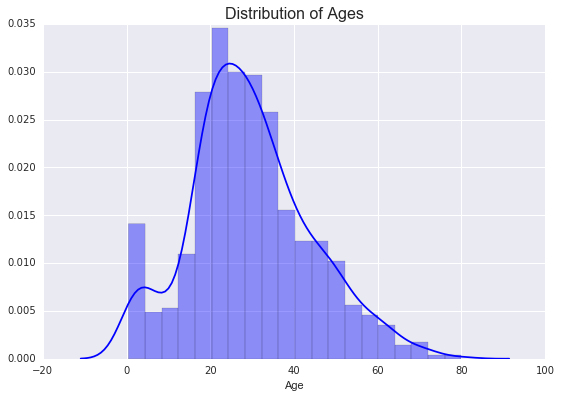

In [183]:
# Visualize the distribution of ages
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sns.distplot(no_na_data['Age'], color="b")
pl.title('Distribution of Ages', fontsize=16);

**Now I will explore some statistics on the fares that the passengers paid**

In [184]:
npFares = np.array(no_na_data['Fare'])
#Find the cheapers ticket fare
minimum_fare= np.amin(npFares[npFares != 0]) 

#Find the most expensive ticket fare
maximum_fare = np.amax(npFares)

#Find the average fare
mean_fare = np.mean(npFares[npFares != 0])

#Find the median fare
median_fare = np.median(npFares[npFares != 0])

# Find the standard deviation of fares
std_fare = np.std(npFares[npFares != 0])

# Show the calculated statistics
print "Statistics for Titanic passenger fares:\n"
print "Cheapest ticket fare: {}".format(minimum_fare)
print "Most expensive ticket fare: {}".format(maximum_fare)
print "Mean fare: {}".format(mean_fare)
print "Median fare {}".format(median_fare)
print "Standard deviation of fares: {}".format(std_fare)

Statistics for Titanic passenger fares:

Cheapest ticket fare: 4.0125
Most expensive ticket fare: 512.3292
Mean fare: 34.9104723404
Median fare 15.85
Standard deviation of fares: 53.0506317909


**The statistics for the fares tell us a couple of interesting things:**
* The most expensive ticket was more than a hundred times more expensive than the cheapest ticket
* The mean fare is more than double the median fare, which means the outliers are pulling the mean up
* The relatively large standard deviation means that there was a fair amount of variance in the prices

**Next I will visualize the distribution of fares**

(Since the mean fare is greater than the median fare, I am expecting to see a distribution that is skewed to the right.)

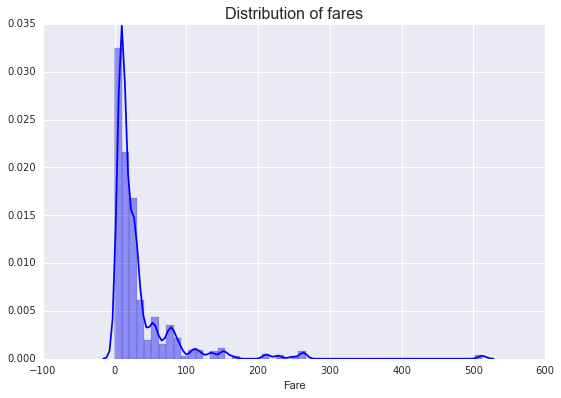

In [185]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sns.distplot(no_na_data['Fare'], color="b")
pl.title('Distribution of fares', fontsize=16);

It is interesting to note that the majority of the fares were less than 25 and there are some extreme outliers which have skewed the distribution to the right.

**Next I will visualize the distribution of classes.**

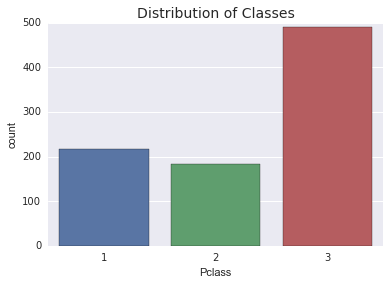

In [186]:
sns.countplot(data['Pclass'])
pl.title('Distribution of Classes', fontsize=14);

The distribution of classes shows that the majority of passengers were class 3 passengers and there were just slightly more first class than second class.

**Next I will product a plot which shows the number of survivors and non-survivors from each class.**

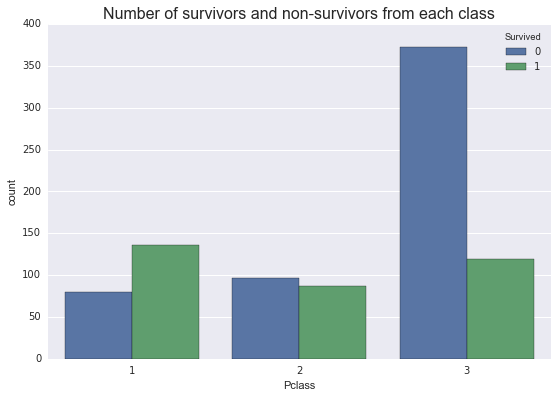

In [187]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sns.countplot(data["Pclass"], hue=data['Survived']);
pl.title('Number of survivors and non-survivors from each class', fontsize=16);
plt.show()

**There are several interesting observations to be made from the above plot:**
* The first class was the only class which had more survivors than non-survivors.
* In second class there were nearly the same number of survivors as non-survivors.
* Third class had roughly three times more non-survivors than survivors.

This discovery begs the question, why was the survival rate so much higher for the first class passengers? Of course I can only speculate, but here are a couple of possible reasons:
* The first class passengers were probably wealthier individuals, maybe an effort was made to save the wealthy.
* It is possible that the locations of the first class cabins were positioned advanageously on the ship, making it easier for them to reach the deck and get to the life boats more quickly.

Whatever the reason, it is obvious that the passengers in first and second class were rescued at a much higher rate than the third class passengers.

**Now I will run a similar analysis of the Sex feature and see what the rate of survival was for each gender**

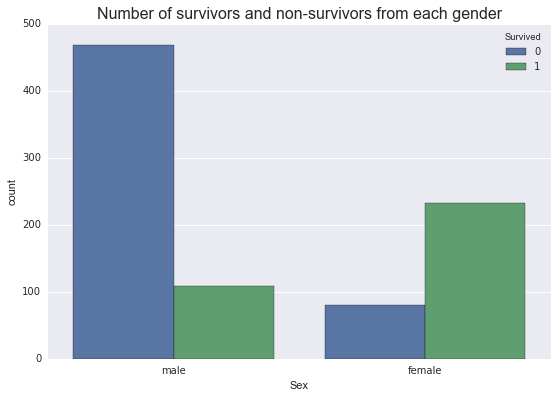

The total number of male passengers was 577 and 18.89% of them survived
The total number of female passengers was 314 and 74.20% of them survived


In [188]:
gender_survival = []
gender_survival.append(len(data[data['Sex']=='male'][data['Survived']==1]))
gender_survival.append(len(data[data['Sex']=='male'][data['Survived']==0]))
gender_survival.append(len(data[data['Sex']=='female'][data['Survived']==1]))
gender_survival.append(len(data[data['Sex']=='female'][data['Survived']==0]))
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
sns.countplot(data["Sex"], hue=data['Survived']);
pl.title('Number of survivors and non-survivors from each gender', fontsize=16);
plt.show()
print "The total number of male passengers was {} and {:.2f}% of them survived".format(sum(gender_survival[0:2]),((gender_survival[0]*1.0)/sum(gender_survival[0:2])*100))
print "The total number of female passengers was {} and {:.2f}% of them survived".format(sum(gender_survival[2:4]),((gender_survival[2]*1.0)/sum(gender_survival[2:4])*100))

**Observations from the survival rates by gender**
* Almost two-thirds of the total passengers were male, and of them, only 18.89% survived.
* Even though there was significantly fewer female than male passengers, 74.2% of them survived, and there were more than twice as many female survivors as male surivors.
* There must have been a deliberate effort to save women first.

**In the next step I am going to do some bivariate analysis of the dataset. Because some of the variables are categorical I am going to need to create some new columns with numerical values to represent the different categories**

* First I am going to get rid of the Sex column and replace it with Male and Female columns.

* Then I am going to get rid of the Embarked column and replace it with a column for each of the three locations (C, Q and S).

* Finally I am going to delete the columns Name, Ticket and PassengerId because they don't tell us any interesting information about the individual passengers and will not be useful in the analysis.

In [189]:
data = pd.concat([data, pd.get_dummies(data['Sex'])], axis=1)
data = pd.concat([data, pd.get_dummies(data['Embarked'])], axis=1)
del data['Sex']
del data['Name']
del data['Ticket']
del data['PassengerId']
del data['Embarked']
data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1


* The SibSp variable and the Parch variable basically tell us the same thing, whether the passenger is traveling alone or with family. Therefore, I am going to combine the two columns into a new column called Family which will contain the total number from each of the two columns.

In [190]:
data['Family'] = data['SibSp']+data['Parch']
del data['SibSp']
del data['Parch']
data.head()

,Survived,Pclass,Age,Fare,female,male,C,Q,S,Family
0,0,3,22,7.2500,0,1,0,0,1,1
1,1,1,38,71.2833,1,0,1,0,0,1
2,1,3,26,7.9250,1,0,0,0,1,0
3,1,1,35,53.1000,1,0,0,0,1,1
4,0,3,35,8.0500,0,1,0,0,1,0


**Next I am going to visualize a correlation matrix of the passenger features and explore the following questions:**
* Which variables are highly correlated with each other?
* Which variables have a positive correlation with survival?
* Which variables have a negative correlation with survival?

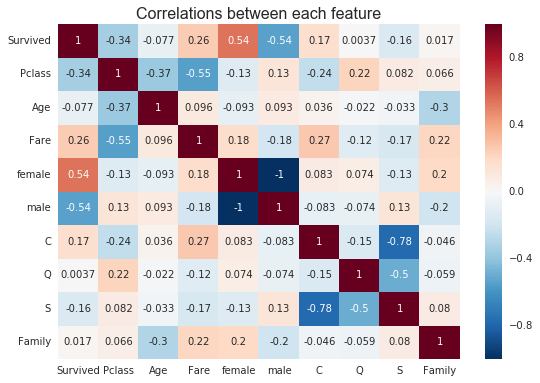

In [191]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
corrplot = data.corr()
sns.heatmap(corrplot, annot=True);
pl.title('Correlations between each feature', fontsize=16);
plt.show()

Looking at the above matrix of correlations, it is interesting to note that the variable which had the highest correlation with survival was gender. More specifically, females had a high positive correlation with survival while males had a negative correlation with survival. This is probably due to the fact that, with the limited life boats, an attempt was made to save women and children first, so more men were still on the ship when it sank.

The variable Pclass had substantial negative correlations with age, fare and survival. It makes sense that the Pclass variable would have a negative correlation with Fare because first class tickets would cost more. I am also going to make the conclusion that older people purchased more first class tickets because they had more money and could afford them. As to the correlation with Pclass and Survival, I can only guess that either an attempt was made to save the first class passengers first, or the locations of the first class rooms were advantageous to survival, and that these people had an easier time getting from their rooms to the lifeboats.

Some additional observations are that, those who embarked from C (Cherbourg) had the highest chance of survival while those who embarked from S (Southampton) had the lowest chance of survival.

The two variables Age and Family had almost no correlation with survival.

Since the two variables which had the strongest correlation with survival were gender and Pclass. I am curious to see how many passengers fell in to the category of being both Female and First Class passengers, and what was there rate of survival?

In [192]:
print "The number of First Class, Female Passengers who survived was {}.".format(
    len(data[data['female']==1][data['Pclass']==1][data['Survived']==1]))
print "The number of First Class, Female Passengers who died was {}.".format(
    len(data[data['female']==1][data['Pclass']==1][data['Survived']==0]))

The number of First Class, Female Passengers who survived was 91.
The number of First Class, Female Passengers who died was 3.


Not surprisingly, nearly all of the First Class, Female passengers survived. Out of 94 such passengers, only 3 of them did not survive. This clearly shows which demographic of passenger was given priority when they were deciding who to save.

Conclusion
----------
Due to the nature of the data set, with the large number of missing values and its limited number of features, it is difficult to draw any hard conclusions. Still there are many interesting observations which can be drawn such as:
* The percent of passengers who survived, which was 38.38%.
* The average age of the passengers was less than 30 years old.
* The oldest passenger was 80 years old while average life expectency at that time was around 50.
* The youngest passenger was less than half a year old.
* Both the youngest and oldest passengers survived.
* The average ticket cost was 15 (I am assuming British Pounds). Factoring in inflation, 15 Pounds in 1912 is equal to about 1500 Pounds today.
* The demographic which had the highest rate of survival was First Class, Female passengers, of whom, nearly 97% survived.

Further analysis could include implementation of a machine learning algorithm to see if it is possible to design a model to predict the survival outcomes for each passenger based on their individual features, but that is beyond the scope of this project.